<a href="https://colab.research.google.com/github/alilotfi90/Ali_in_the_Quantum_Land/blob/main/deutch_josza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit==0.37



In [3]:

!pip install qiskit-ibmq-provider



In [4]:
%matplotlib inline

from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *





In [5]:
import numpy as np

In [6]:
n = 3

const_oracle = QuantumCircuit(n + 1)

output = np.random.randint(2)

if output == 0:
    const_oracle.x(n)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [7]:
balanced_oracle = QuantumCircuit(n + 1)

for i in range(n):
    balanced_oracle.cx(i, n)

balanced_oracle.draw()

q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘

In [8]:
dj_circuit = QuantumCircuit(n + 1, n)

In [9]:
dj_circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
c: 3/

In [10]:
for qubit in range(n):
  dj_circuit.h(qubit)


In [11]:
dj_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘
q_3: ─────
          
c: 3/═════

In [12]:
dj_circuit.x(n)

In [13]:
dj_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ X ├
     └───┘
c: 3/═════

In [14]:
dj_circuit.h(n)

In [15]:
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [16]:
dj_circuit.barrier()

In [17]:
dj_circuit.draw()

┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_3: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 3/═════════════

In [18]:
dj_circuit+=balanced_oracle

<ipython-input-18-64b299be11e8>:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit+=balanced_oracle


In [19]:
dj_circuit.draw()

┌───┐      ░                
q_0: ┤ H ├──────░───■────────────
     ├───┤      ░   │            
q_1: ┤ H ├──────░───┼────■───────
     ├───┤      ░   │    │       
q_2: ┤ H ├──────░───┼────┼────■──
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├
     └───┘└───┘ ░ └───┘└───┘└───┘
c: 3/════════════════════════════

In [20]:
dj_circuit.barrier()
dj_circuit.draw()

┌───┐      ░                 ░ 
q_0: ┤ H ├──────░───■─────────────░─
     ├───┤      ░   │             ░ 
q_1: ┤ H ├──────░───┼────■────────░─
     ├───┤      ░   │    │        ░ 
q_2: ┤ H ├──────░───┼────┼────■───░─
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ 
c: 3/═══════════════════════════════

In [21]:
for qubit in range(n):
  dj_circuit.h(qubit)

for qubit in range(n):
  dj_circuit.measure(qubit, qubit)

In [22]:
dj_circuit.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├─╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────┼────■───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

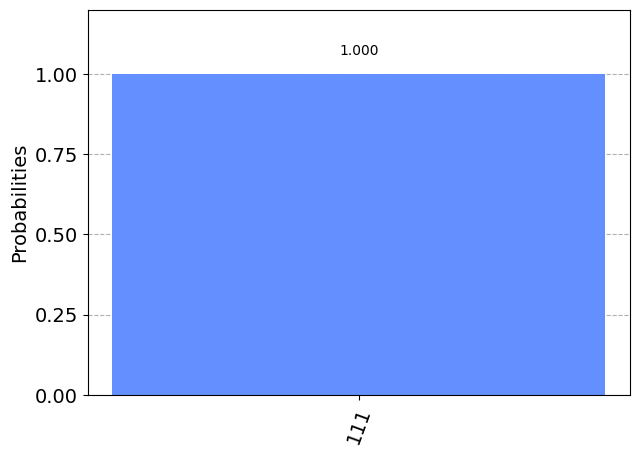

In [23]:
qasm_sim = Aer.get_backend('qasm_simulator')

shots = 1

qobj = assemble(dj_circuit,qasm_sim)

results = qasm_sim.run(qobj).result()

answer = results.get_counts()

plot_histogram(answer)



In [24]:
from qiskit import IBMQ

# Replace 'YOUR_API_TOKEN' with your actual IBM Quantum Experience API token
IBMQ.save_account('token', overwrite=True)

In [25]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider = IBMQ.get_provider('ibm-q')

# Fetch all backends and print their status
for backend in provider.backends():
    status = backend.status()
    config = backend.configuration()
    print(f"Backend: {backend.name()}")
    print("  Operational:", status.operational)
    print("  Pending jobs:", status.pending_jobs)
    print("  Qubits:", config.n_qubits)
    print("  Simulator:", config.simulator)
    print("  Backend type:", "Quantum computer" if not config.simulator else "Simulator")
    print()

Backend: ibmq_qasm_simulator
  Operational: True
  Pending jobs: 0
  Qubits: 32
  Simulator: True
  Backend type: Simulator

Backend: simulator_statevector
  Operational: True
  Pending jobs: 0
  Qubits: 32
  Simulator: True
  Backend type: Simulator

Backend: simulator_mps
  Operational: True
  Pending jobs: 0
  Qubits: 100
  Simulator: True
  Backend type: Simulator

Backend: simulator_extended_stabilizer
  Operational: True
  Pending jobs: 0
  Qubits: 63
  Simulator: True
  Backend type: Simulator

Backend: simulator_stabilizer
  Operational: True
  Pending jobs: 0
  Qubits: 5000
  Simulator: True
  Backend type: Simulator

Backend: ibm_sherbrooke
  Operational: True
  Pending jobs: 302
  Qubits: 127
  Simulator: False
  Backend type: Quantum computer

Backend: ibm_brisbane
  Operational: True
  Pending jobs: 1173
  Qubits: 127
  Simulator: False
  Backend type: Quantum computer

Backend: ibm_kyoto
  Operational: True
  Pending jobs: 30
  Qubits: 127
  Simulator: False
  Backend typ

In [27]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibm_kyoto')

In [ ]:
qasm_sim = Aer.get_backend('qasm_simulator')

shots = 1

qobj = assemble(dj_circuit,qasm_sim)

results = qasm_sim.run(qobj).result()

answer = results.get_counts()

plot_histogram(answer)

In [29]:
from qiskit.tools.monitor import job_monitor

job = execute(dj_circuit, qcomp, shots=1)




In [30]:
job_monitor(job)

Job Status: job has successfully run


In [32]:
results = job.result()
counts = results.get_counts(dj_circuit)
print(counts)

{'111': 1}
